In [3]:
import numpy as np
import re

# Define possible values for each hyperparameter in the order you want the dimensions
hidden_dim_options = [8, 32, 128]
episodes_options = [500, 1500, 4500]
gamma_options = [0.9, 0.95, 0.99]
learning_rate_options = [0.001, 0.01, 0.1]

# Create a mapping from value -> index for each parameter
hidden_map = {v: i for i, v in enumerate(hidden_dim_options)}
episodes_map = {v: i for i, v in enumerate(episodes_options)}
gamma_map = {v: i for i, v in enumerate(gamma_options)}
lr_map = {v: i for i, v in enumerate(learning_rate_options)}

# Initialize 4D matrix
results = np.full((3, 3, 3, 3), np.nan)

# Read the file
with open("results_gs.txt", "r") as f:
    content = f.read()

# Split into blocks (each block has params + reward)
blocks = content.strip().split("\n\n")

for block in blocks:
    # Extract parameters
    params_line, reward_line, *_ = block.split("\n")

    # Parse parameters
    hidden = int(re.search(r"--hidden_dim'?,\s*'?(\d+)", params_line).group(1))
    episodes_val = int(re.search(r"--episodes'?,\s*'?(\d+)", params_line).group(1))
    gamma = float(re.search(r"--gamma'?,\s*'?(\d*\.\d+)", params_line).group(1))
    lr = float(re.search(r"--learning_rate'?,\s*'?(\d*\.\d+)", params_line).group(1))

    # Parse reward
    avg_reward = float(re.search(r"average reward:\s*([\d\.]+)", reward_line).group(1))

    # Store in array
    results[
        hidden_map[hidden],
        episodes_map[episodes_val],
        gamma_map[gamma],
        lr_map[lr],
    ] = avg_reward

results.shape

(3, 3, 3, 3)

In [4]:
results[0,0]

array([[252.5, 112. , 276.9],
       [290.6, 269.5, 278.7],
       [293.8, 200.5, 110.3]])

In [7]:
import matplotlib.pyplot as plt

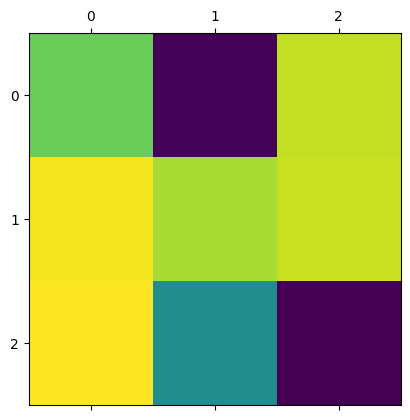

In [8]:
plt.matshow(results[0,0])